<a href="https://colab.research.google.com/github/njamieson2014/statss/blob/main/Copy_of_Hahn_Math_24_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Normal Random Number Generator

In [3]:
#CDF PDF

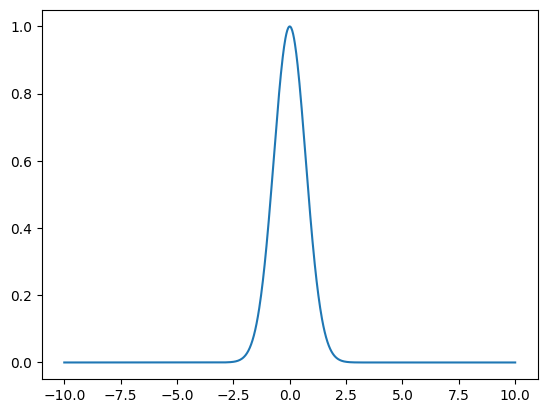

In [4]:
x = np.linspace(-10,10,1000)
y = 2.71**(-x**2)
plt.plot(x,y)

$e^{-x^2}$

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/4abaca87a10ecfa77b5a205056523706fe6c9c3f)

In [6]:
def normal_pdf(x,mu,sigma): #define a normal curve, with all mean and sd parameters

  return (1/(np.sqrt(2*np.pi*sigma**2)))*np.exp((-(x-mu)**2)/(2*sigma**2))

In [7]:
x = np.linspace(-6,6,1000)

In [8]:
x

array([-6.        , -5.98798799, -5.97597598, -5.96396396, -5.95195195,
       -5.93993994, -5.92792793, -5.91591592, -5.9039039 , -5.89189189,
       -5.87987988, -5.86786787, -5.85585586, -5.84384384, -5.83183183,
       -5.81981982, -5.80780781, -5.7957958 , -5.78378378, -5.77177177,
       -5.75975976, -5.74774775, -5.73573574, -5.72372372, -5.71171171,
       -5.6996997 , -5.68768769, -5.67567568, -5.66366366, -5.65165165,
       -5.63963964, -5.62762763, -5.61561562, -5.6036036 , -5.59159159,
       -5.57957958, -5.56756757, -5.55555556, -5.54354354, -5.53153153,
       -5.51951952, -5.50750751, -5.4954955 , -5.48348348, -5.47147147,
       -5.45945946, -5.44744745, -5.43543544, -5.42342342, -5.41141141,
       -5.3993994 , -5.38738739, -5.37537538, -5.36336336, -5.35135135,
       -5.33933934, -5.32732733, -5.31531532, -5.3033033 , -5.29129129,
       -5.27927928, -5.26726727, -5.25525526, -5.24324324, -5.23123123,
       -5.21921922, -5.20720721, -5.1951952 , -5.18318318, -5.17

In [55]:
mu = 0 #mean value

In [27]:
sigma = 1 #sd

In [56]:
pdf = normal_pdf(x,mu,sigma)

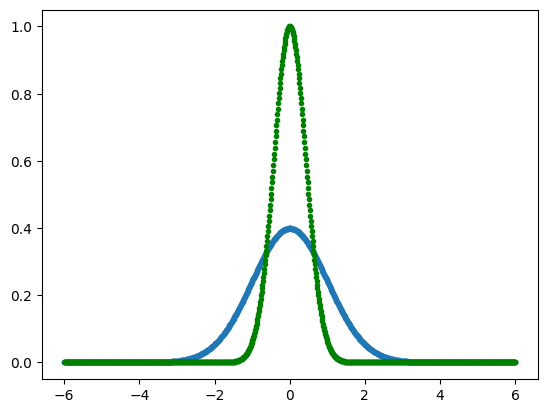

In [57]:
plt.plot(x,pdf,'.')
plt.plot(x,y,'g.')

In [31]:
n= 5
x[0:n]
np.sum(x[0:n])

-29.879879879879876

In [52]:
def cumulative_sum(x): #create a function to evaluate the cumulative sum of the evenly spaced array x

  y = np.zeros(x.shape) #create zeroes for each spot in x

  for n in range(x.shape[0]): #for each n value in range of x

    y[n] = np.sum(x[0:n]) #y(n)=the sum of all values of x from 0 to n
  #y = y / np.max(y)
  return y

In [59]:
z = np.array([1,2,3,4,5])

In [60]:
z

array([1, 2, 3, 4, 5])

In [61]:
cumulative_sum(z)

array([ 0.,  1.,  3.,  6., 10.])

In [85]:
cdf = cumulative_sum(pdf) #adds all terms in the normal curve plot

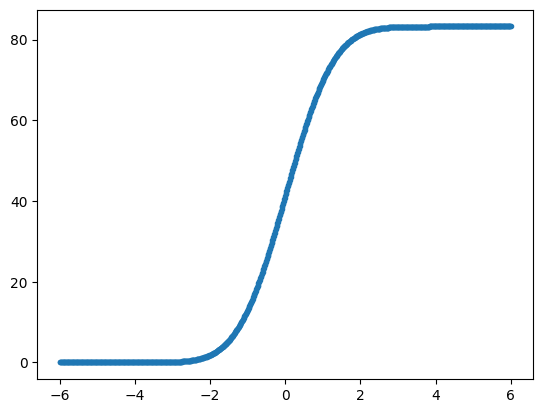

In [63]:
plt.plot(x,cdf,'.');

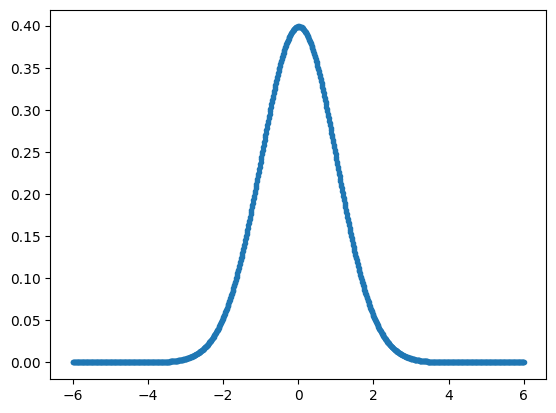

In [64]:
d_cdf = cdf[1:] - cdf[0:-1] #Demo to show that the derivative of the cdf gives you back the pdf
plt.plot(x[1:],d_cdf,'.');  #Not required for sampling

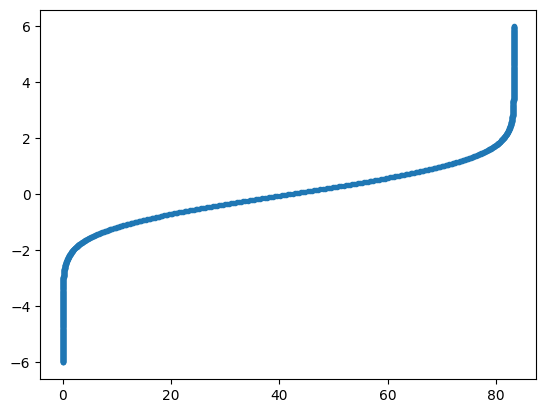

In [65]:
plt.plot(cdf,x,'.'); #flips the axis, shows % chance a point on the y axis is in the data pool

In [71]:
def find_nearest(array, value):

  idx = np.argmin(np.abs(array - value)) #finds the absolute difference between each point in the array, and the inputted "value", then takes the index number in the array of the value that has the smallest differnce

  return idx

In [67]:
z = np.array([11.2,32,63,4.3,5.67])

In [72]:
find_nearest(z, 11) #finds index of the closest value in array Z to the inputted number

0

In [73]:
z[1]

32.0

In [94]:
find_nearest(cdf, 80) #finds the point where the CDF is closest to the inputted value

647

In [95]:
x[647]

1.771771771771772

In [142]:
xr = np.random.random((10000,))

In [143]:
r = np.random.random()

In [144]:
r

0.3857620098784291

In [145]:
x[find_nearest(cdf, r)]

-2.600600600600601

In [146]:
w = np.zeros(xr.shape[0])

for i in range(xr.shape[0]):

  w[i] = x[find_nearest(cdf, xr[i])]

In [147]:
w.shape

(10000,)

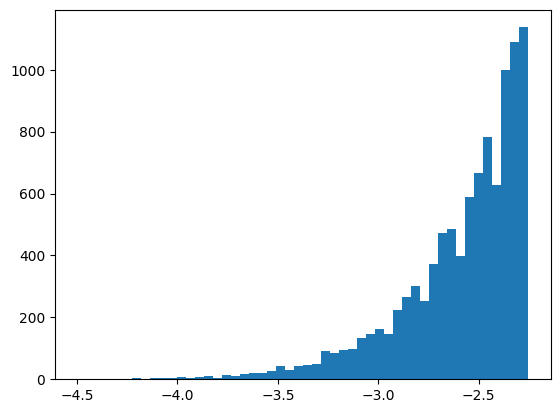

In [148]:
plt.hist(w,50); #half of a normal curve

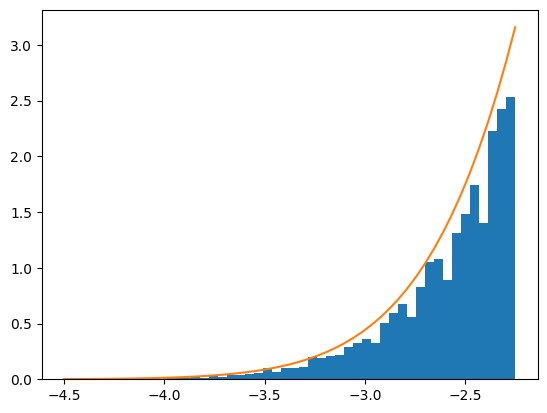

In [152]:
num_bins = 50
n,bins,patches = plt.hist(w, num_bins, density=1) #histograph of nearest value of cdf
y = (100*(1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2)) #sd curve
plt.plot(bins,y)

# Homework

# Birthday Paradox

In [153]:
import random

def simulate_birthday_paradox(people, simulations):
    matches = 0

    for i in range(simulations):
        birthdays = [random.randint(1, 365) for _ in range(people)] #generates number between 1 and 365 for # of "people"
        if len(birthdays) != len(set(birthdays)): #if the length of the array is different than the # of unique values then add one to "matches"
            matches += 1

    probability = matches / simulations
    return probability

# Number of people in the room
people = 30

# Number of simulations
simulations = 100000

# Calculate the probability
probability = simulate_birthday_paradox(people, simulations)
probability


0.70765

# Monty Hall

In [113]:
def simulate_monty_hall_final(simulations):
    wins_switching = 0
    wins_staying = 0

    for _ in range(simulations):
        # Randomly assign the car to a door (1, 2, or 3)
        car_door = random.randint(1, 3)
        # Player makes an initial choice
        player_choice = random.randint(1, 3)

        # Host opens a door, which is neither the player's choice nor the car door
        for host_choice in [1, 2, 3]:
            if host_choice != car_door and host_choice != player_choice:
                break

        # Find the remaining door for the player to switch to
        for switch_choice in [1, 2, 3]:
            if switch_choice != player_choice and switch_choice != host_choice:
                break

        # Count the number of wins for staying with the initial choice
        if player_choice == car_door:
            wins_staying += 1

        # Count the number of wins for switching to the other door
        if switch_choice == car_door:
            wins_switching += 1

    # Calculate the probabilities of winning by staying and switching
    probability_staying = wins_staying / simulations
    probability_switching = wins_switching / simulations

    return probability_staying, probability_switching

# Running the final version of the simulation
final_probability_staying, final_probability_switching = simulate_monty_hall_final(simulations)
final_probability_staying, final_probability_switching


(0.334, 0.666)

# Simple Craps

In [134]:
def simulate_dice_game(simulations):
    wins = 0

    for _ in range(simulations):
        # Roll two six-sided dice
        roll = random.randint(1, 6) + random.randint(1, 6)

        # Check for immediate win or loss
        if roll in [7, 11]:
            wins += 1
            continue
        elif roll in [2, 3, 12]:
            continue

        # Save the initial roll
        initial_roll = roll

        # Re-roll phase
        while True:
            roll = random.randint(1, 6) + random.randint(1, 6)
            if roll == 7:  # Loss condition
                break
            elif roll == initial_roll:  # Win condition
                wins += 1
                break

    probability_of_winning = wins / simulations
    return probability_of_winning

# Number of simulations
simulations = 10000

# Calculate the probability
probability_of_winning = simulate_dice_game(simulations)
probability_of_winning


0.4951

# Collector's Card Paradox


In [139]:
def simulate_card_collectors_problem(n, simulations):
    total_card_packs_bought = 0

    for _ in range(simulations):
        collected_characters = set()
        card_packs_bought = 0

        # Buy card packs until all characters are collected
        while len(collected_characters) < n:
            new_card = random.randint(1, n)
            collected_characters.add(new_card)
            card_packs_bought += 1

        total_card_packs_bought += card_packs_bought

    # Calculate the average number of card packs needed
    average_card_packs_needed = total_card_packs_bought / simulations
    return average_card_packs_needed

# Number of different characters
n = 100

# Calculate the expected number of card packs
expected_card_packs = simulate_card_collectors_problem(n, simulations)
expected_card_packs


518.2743

In [140]:
import random

def simulate_sock_drawer_problem(n, simulations):
    total_draws = 0

    for _ in range(simulations):
        socks = {}
        draws = 0

        while True:
            # Randomly draw a sock
            sock_color = random.randint(1, n)
            draws += 1

            # Update the count for this color
            if sock_color in socks:
                socks[sock_color] += 1
            else:
                socks[sock_color] = 1

            # Check for a pair
            if socks[sock_color] == 2:
                break

        total_draws += draws

    # Calculate the average number of draws needed
    average_draws_needed = total_draws / simulations
    return average_draws_needed

# Number of pairs of socks
n = 10

# Number of simulations
simulations = 10000

# Calculate the expected number of draws
expected_draws = simulate_sock_drawer_problem(n, simulations)
expected_draws


4.6497